In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# attack_type = 'none'
# datasets = 'pokec_n pokec_z credit bail dblp'.split()
datasets = 'pokec_z pokec_n dblp'.split()
models = 'gcn'.split()
df_results = pd.DataFrame()
for dataset in datasets:
    for model in models:
        for ptb_rate in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
            for attack_type in 'fair_attack'.split():
                for target in 'y1s1 y1s0'.split():
                    for connection_type in 'DD DE EE ED'.split() if attack_type=='fair_attack' else ['None']:
                        c_attack_type = attack_type
                        if ptb_rate == 0: c_attack_type = 'none'
                        fname = f'../../results/result-{dataset}-{model}-{c_attack_type}' + ('' if c_attack_type=='none' else (f'-{ptb_rate:.2f}' if c_attack_type!='fair_attack' else f'-{target}-{connection_type}-deg0-null-{ptb_rate:.2f}')) +'.csv'
                        if not os.path.exists(fname):
                            fname = f'../../results/result-{dataset}-region-{model}-{c_attack_type}' + ('' if c_attack_type=='none' else (f'-{ptb_rate:.2f}' if c_attack_type!='fair_attack' else f'-{target}-{connection_type}-deg0-null-{ptb_rate:.2f}')) +'.csv'
                        if not os.path.exists(fname):
                            print(f'File not found: {fname}')
                            continue
                        df_current = pd.read_csv(fname)
                        df_current['dataset'] = dataset
                        df_current['model'] = model
                        df_current['attack_type'] = attack_type
                        df_current['ptb_rate'] = ptb_rate
                        df_current['Strategy']=connection_type
                        df_current['Target'] = target
                        df_current['seed'] = [42, 0, 1, 2, 100]
                        df_results = pd.concat([df_results, df_current], ignore_index=True)

File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.05.csv
File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.10.csv
File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.15.csv
File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.20.csv
File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.25.csv
File not found: ../../results/result-pokec_z-region-gcn-fair_attack-y1s0-ED-deg0-null-0.30.csv
File not found: ../../results/result-pokec_n-region-gcn-fair_attack-y1s0-ED-deg0-null-0.10.csv
File not found: ../../results/result-pokec_n-region-gcn-fair_attack-y1s0-ED-deg0-null-0.15.csv
File not found: ../../results/result-pokec_n-region-gcn-fair_attack-y1s0-ED-deg0-null-0.20.csv
File not found: ../../results/result-pokec_n-region-gcn-fair_attack-y1s0-ED-deg0-null-0.25.csv
File not found: ../../results/result-pokec_n-regio

In [3]:
df_results['FN1'] = 1-df_results['yp1.y1a1']
df_results['FP0'] = df_results['yp1.y0a0']
df_results['FN0'] = 1-df_results['yp1.y1a0']
df_results['FP1'] = df_results['yp1.y0a1']

In [4]:
df_results['signed_parity'] = df_results['yp1.y0a0'] + df_results['yp1.y1a0'] - df_results['yp1.y1a1'] - df_results['yp1.y0a1']

In [5]:
df_results.loc[df_results.attack_type=='iter1','attack_type'] = 'MH-BFS'
df_results.loc[df_results.attack_type=='iter2','attack_type'] = 'MH-DFS'
df_results.loc[df_results.attack_type=='iter3','attack_type'] = 'MH-DFS-Rand'

In [6]:
df_results['Category'] = '_'

In [7]:
df_results.loc[df_results.attack_type=='dice','Category'] = 'Accuracy-targeting'
df_results.loc[df_results.attack_type=='random','Category'] = 'Baseline'
df_results.loc[df_results.attack_type=='prbcd','Category'] = 'Accuracy-targeting'
df_results.loc[df_results.attack_type=='fair_attack','Category'] = 'Ours'

In [8]:
df_results.loc[df_results.attack_type=='spih','attack_type'] = 'Inject+'
df_results.loc[df_results.attack_type=='spih-rev','attack_type'] = 'Inject-'
df_results.loc[df_results.attack_type=='rspis','attack_type'] = 'AnchorRewire+'
df_results.loc[df_results.attack_type=='rspis-rev','attack_type'] = 'AnchorRewire-'
df_results.loc[df_results.attack_type=='rspis2','attack_type'] = 'Rewire+'
df_results.loc[df_results.attack_type=='rspis-rev2','attack_type'] = 'Rewire-'
df_results.loc[df_results.attack_type=='sacide','attack_type'] = 'SA-CIDE'
df_results.loc[df_results.attack_type=='dice','attack_type'] = 'DICE'
df_results.loc[df_results.attack_type=='random','attack_type'] = 'Random'
df_results.loc[df_results.attack_type=='prbcd','attack_type'] = 'PR-BCD'

In [9]:
df_results.loc[(df_results.attack_type=='fair_attack') & (df_results.Target=='y1s1'),'attack_type'] = u'$y_1s_1$-DD'
df_results.loc[(df_results.attack_type=='fair_attack') & (df_results.Target=='y1s0'),'attack_type'] = u'$y_1s_0$-DD'

In [10]:
df_results['Attack'] = df_results.attack_type

In [11]:
df_results['attack'] = df_results.attack_type.apply(lambda x:x[:-1] if (x[-1] in '-+') else x)
df_results['direction'] = df_results.attack_type.apply(lambda x:x[-1] if (x[-1] in '-+') else '0')

In [12]:
df_results['_']=''

In [13]:
sns.set_style('whitegrid')

In [14]:
dataset_map = {'pokec_n':'Pokec_n', 'pokec_z':'Pokec_z', 'dblp':'DBLP'}

In [15]:
df_results['Dataset'] = df_results.dataset.apply(lambda x:dataset_map[x])

In [16]:
df_results['attack'].unique()

array(['$y_1s_1$-DD', '$y_1s_0$-DD'], dtype=object)

In [17]:
df_results.columns

Index(['acc', 'auc', 'precision', 'recall', 'maf1', 'mif1', 'yp1.a1', 'yp1.a0',
       'yp1.y1a1', 'yp1.y1a0', 'yp1.y0a1', 'yp1.y0a0', 'parity', 'equality',
       'eq_odds', 'dataset', 'model', 'attack_type', 'ptb_rate', 'Strategy',
       'Target', 'seed', 'FN1', 'FP0', 'FN0', 'FP1', 'signed_parity',
       'Category', 'Attack', 'attack', 'direction', '_', 'Dataset'],
      dtype='object')

In [18]:
df_err = pd.melt(df_results, id_vars='Attack seed ptb_rate Dataset Strategy'.split(), value_vars='FN0 FP0 FN1 FP1'.split(), value_name='error',var_name='error_type')
df_err.error_type = df_err.error_type.str.upper()
df_err.error = df_err.error
df_err['_'] ='_'

In [19]:

sns.set(font='serif', style='whitegrid')

<Figure size 432x288 with 0 Axes>

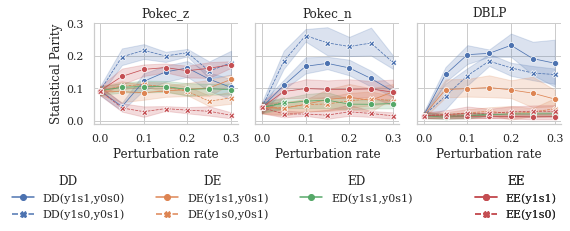

In [235]:
# for dataset in datasets:
# print('=======================' +  dataset + '=======================')
# for measure in 'parity err_y0s0 err_y0s1 err_y1s0 err_y1s1 acc'.split():
measure = 'parity'
plt.figure()
g = sns.FacetGrid(df_results, col='Dataset', sharey=True, height=2.5)
# for atks in [df_results.Attack.unique()[:2],['PR-BCD'],['DICE','Random']]:
#     print(atks)
strats = 'DD DE ED EE'.split()
g.map(sns.lineplot,'ptb_rate', measure,'Strategy','_','Target', markers=True, hue_order=strats)
g.set_titles('{col_name}')
g.set_axis_labels("Perturbation rate", "Statistical Parity")

plt.legend()
handles, labels = g.axes[0,-1].get_legend_handles_labels()

ii =0
## Please correct the ordering here
ed_labels = ['DD(y1s1,y0s0) DD(y1s0,y0s1)'.split(),
            'DE(y1s1,y0s1) DE(y1s0,y0s1)'.split(),
            'ED(y1s1,y0s1) ED(y1s0,y0s0)'.split(),
            'EE(y1s1) EE(y1s0) EE(y0s1) EE(y0s0)'.split()]
for chandle, clabel in zip(handles[1:5], labels[1:5]):
    for shandle, slabel in zip(handles[6:6+len(ed_labels[ii])], labels[6:6+len(ed_labels[ii])]):
        shandle.set_color(chandle.get_color())

    l1 = plt.legend(bbox_to_anchor=(-2+ii, -.45), loc='upper right',
                    ncol=1, borderaxespad=0.,handles=handles[6:6+len(ed_labels[ii])],labels=ed_labels[ii],title=strats[ii],frameon=False)
    g.axes[0,-1].add_artist(l1)
    ii+=1
    


plt.savefig(f'../../reports/figures/{measure}-legend-thing.pdf', bbox_inches='tight')
